In [72]:
import pandas as pd
import missingno as msno

pd.set_option('display.max_rows', None)  # Без ограничений по строкам
pd.set_option('display.max_columns', None)  # Без ограничений по столбцам
pd.set_option('display.width', None)  # Автоматическая ширина вывода
pd.set_option('display.max_colwidth', None)

In [73]:

df_expanded = pd.read_csv("PSB/data/finances_processed.csv")
# patterns_to_keep_v03_01 = ["inn", "1200", "1300", "1400", "1500", "1530", '1600', '1700', "2100", "2110", "2200", "2400","3221", "3311", "3500"]
# patterns_to_keep_v03_01 = ["inn", "1300", "2200", "2400"]
patterns_to_keep_v03_01 = ["inn", "1200", "1300", "1400", "1500", "1530", '1600', '1700', "2100", "2110", "2200", "2300", "2400"]
filtered_columns_v03_01 = [col for col in df_expanded.columns if any(str(num) in str(col) for num in patterns_to_keep_v03_01)]
df_filtered_v03_01 = df_expanded[filtered_columns_v03_01]
df_filtered_v03_01.head()
df_filtered_v03_01.to_csv("PSB/data/finances_v03_01.csv")
new_columns = {}
for col in df_filtered_v03_01.columns:
    if col == "inn":
        new_columns[col] = "inn"
        continue
    parts = col.split('_')
    # print(parts)
    new_name = f"{parts[1]}_{parts[2]}"
    new_columns[col] = new_name
df_filtered_v03_01 = df_filtered_v03_01.rename(columns=new_columns)
sorted_columns = sorted(new_columns.values(), key=lambda x: x.split('_')[0])
sorted_columns.insert(0, "inn")
df_filtered_v03_01 = df_filtered_v03_01[sorted_columns] 
df_filtered_v03_01 = df_filtered_v03_01.loc[:, ~df_filtered_v03_01.columns.duplicated(keep='first')]
# df_filtered_v03_01 = df_filtered_v03_01.dropna(axis=1, thresh=7000)
# df_filtered_v03_01.info()
df_filtered_v03_01.describe()
# df_filtered_v03_01.to_csv("PSB/datafinances_v03_01.csv")
# df_filtered_v03_01.head()

C:\Users\Redmi\AppData\Local\Temp\ipykernel_19384\317652651.py:1: DtypeWarning: Columns (1548,1552,1563,1566,1570,1574,1584,1597,1676,1722,1726,1733,1737,1740,1744,1748,1758,1771,1775,1853,3037,3038,3042,3113,3114,3115,3119,3200,3205,3262,3269,3290,3379,3380,3448,3466,3477,3482,3497,3498,3499,3525,3699,3723,3727,3774,3778,3823,3824,3825,3826,3827,3828,3829,3830,3831,3832,3834,3835,3836,3837,3838,3839,3852,3853,3856,3857,3871,3872,3889,3890,3891,3892,3893,3895,3899,3900,3901,3902,3905,3906,3907,3908,3909,3910,3911,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3929,3930,3931,3932,3933,3934,3935,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3952,3953,3954,3955,3956,3957,3958,3959,3961,3962,3963,3964,3965,3966,3967,4039,4043,4045,4062,4063,4064,4065,4068,4070,4076,4080,4083,4101,4110,4111,4112,4113,4114,4115,4116,4117,4118,4119,4120,4121,4122,4135,4136,4137,4138,4139,4140,4154,4155,4156,4157,4158,4161,4162,4163,4164,4165,4170,4171,4172,4173,4174,4175,4176,4

,inn,2012_1200,2012_1300,2012_1400,2012_1500,2012_1530,2012_1600,2012_1700,2012_2100,2012_2110,2012_2200,2012_2300,2012_2400,2013_1200,2013_1300,2013_1400,2013_1500,2013_1530,2013_1600,2013_1700,2013_2100,2013_2110,2013_2200,2013_2300,2013_2400,2014_1200,2014_1300,2014_1400,2014_1500,2014_1530,2014_1600,2014_1700,2014_2100,2014_2110,2014_2200,2014_2300,2014_2400,2015_1200,2015_1300,2015_1400,2015_1500,2015_1530,2015_1600,2015_1700,2015_2100,2015_2110,2015_2200,2015_2300,2015_2400,2016_1200,2016_1300,2016_1400,2016_1500,2016_1530,2016_1600,2016_1700,2016_2100,2016_2110,2016_2200,2016_2300,2016_2400,2017_1200,2017_1300,2017_1400,2017_1500,2017_1530,2017_1600,2017_1700,2017_2100,2017_2110,2017_2200,2017_2300,2017_2400,2018_1200,2018_1300,2018_1400,2018_1500,2018_1530,2018_1600,2018_1700,2018_2100,2018_2110,2018_2200,2018_2300,2018_2400,2019_1200,2019_1300,2019_1400,2019_1500,2019_1530,2019_1600,2019_1700,2019_2100,2019_2110,2019_2200,2019_2300,2019_2400,2020_1200,2020_1300,2020_1400,2020_1500,2020_1530,2020_1600,2020_1700,2020_2100,2020_2110,2020_2200,2020_2300,2020_2400,2021_1200,2021_1300,2021_1400,2021_1500,2021_1600,2021_1700,2021_2100,2021_2110,2021_2200,2021_2300,2021_2400,2021_1530,2022_1200,2022_1300,2022_1400,2022_1500,2022_1600,2022_1700,2022_2100,2022_2110,2022_2200,2022_2300,2022_2400,2022_1530,2023_1200,2023_1300,2023_1400,2023_1500,2023_1600,2023_1700,2023_2100,2023_2110,2023_2200,2023_2300,2023_2400,2023_1530,2024_1200,2024_1300,2024_1400,2024_1500,2024_1600,2024_1700,2024_2100,2024_2110,2024_2200,2024_2300,2024_2400,2024_1530
count,1.500000e+04,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,5.276000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,6.857000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,7.817000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,9.748000e+03,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.090800e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.208300e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.301600e+04,1.110200e+04,1.471000e+04,7.239000e+03,1.107100e+04,7.250000e+02,1.471600e+04,1.471600e+04,1.101900e+04,1.458000e+04,1.104900e+04,1.105500e+04,1.464400e+04,1.103300e+04,1.499900e+04,7.722000e+03,1.102700e+04,7.700000e+02,1.500000e+04,1.500000e+04,1.102800e+04,1.499400e+04,1.102800e+04,1.102700e+04,1.499200e+04,1.075200e+04,1.497900e+04,7.962000e+03,1.074900e+04,1.498300e+04,1.498300e+04,1.074400e+04,1.496800e+04,1.074400e+04,1.074400e+04,1.496800e+04,7.850000e+02,1.065000e+04,1.496800e+04,8.336000e+03,1.064900e+04,1.497200e+04,1.497200e+04,1.063800e+04,1.494400e+04,1.064300e+04,1.064400e+04,1.495600e+04,8.810000e+02,1.064100e+04,1.499700e+04,8.488000e+03,1.064100e+04,1.499900e+04,1.499900e+04,1.062400e+04,1.496700e+04,1.063400e+04,1.064000e+04,1.499600e+04,8.950000e+02,9.838000e+03,1.395400e+04,7.955000e+03,9.835000e+03,1.396200e+04,1.397000e+04,9.777000e+03,1.386100e+04,9.806000e+03,9.812000e+03,1.392200e+04,8.630000e+02
mean,5.829272e+09,1.649285e+08,7.974395e+07,5.462902e+07,1.206794e+08,2.233101e+05,2.894831e+08,2.894833e+08,5.969681e+07,4.959012e+08,1.825914e+07,1.398569e+07,1.480304e+07,1.894146e+08,7.600468e+07,5.967057e+07,1.340705e+08,4.445610e+05,2.697658e+08,2.697459e+08,6.988190e+07,4.395019e+08,2.095201e+07,1.387075e+07,1.074885e+07,2.001973e+08,7.029855e+07,6.271928e+07,1.506583e+08,2.1188

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   inn        15000 non-null  int64  
 1   2020_1200  11033 non-null  float64
 2   2020_1300  14999 non-null  float64
 3   2020_1500  11027 non-null  float64
 4   2020_1600  15000 non-null  int64  
 5   2020_1700  15000 non-null  int64  
 6   2020_2100  11028 non-null  float64
 7   2020_2110  14994 non-null  float64
 8   2020_2200  11028 non-null  float64
 9   2020_2300  11027 non-null  float64
 10  2020_2400  14992 non-null  float64
 11  2021_1300  14979 non-null  float64
 12  2021_1600  14983 non-null  float64
 13  2021_1700  14983 non-null  float64
 14  2021_2110  14968 non-null  float64
 15  2021_2400  14968 non-null  float64
 16  2022_1300  14968 non-null  float64
 17  2022_1600  14972 non-null  float64
 18  2022_1700  14972 non-null  float64
 19  2022_2110  14944 non-null  float64
 20  2022_2

,inn,2020_1200,2020_1300,2020_1500,2020_1600,2020_1700,2020_2100,2020_2110,2020_2200,2020_2300,2020_2400,2021_1300,2021_1600,2021_1700,2021_2110,2021_2400,2022_1300,2022_1600,2022_1700,2022_2110,2022_2400,2023_1300,2023_1600,2023_1700,2023_2110,2023_2400,2024_1300,2024_1600,2024_1700,2024_2110,2024_2400
0,1001098784,70435000.0,-143410000.0,56275000.0,74077000,74077000,19621000.0,2.219410e+08,-6879000.0,-75303000.0,-73802000.0,-197134000.0,152391000.0,152391000.0,6.797300e+07,-72977000.0,-238777000.0,139897000.0,139897000.0,1.852220e+08,-37066000.0,-273831000.0,123352000.0,123352000.0,1.342630e+08,-37231000.0,-296703000.0,103538000.0,103538000.0,6.583000e+06,-8904000.0
1,1001028755,294277000.0,65096000.0,229453000.0,294548000,294548000,52588000.0,6.941180e+08,9604000.0,5145000.0,5145000.0,73460000.0,383302000.0,383302000.0,7.778040e+08,9035000.0,73295000.0,456052000.0,456052000.0,8.261840e+08,-161000.0,69080000.0,499412000.0,499412000.0,8.394260e+08,-4219000.0,69173000.0,532301000.0,532301000.0,9.074280e+08,93000.0
2,1001095007,NaN,19703000.0,NaN,25456000,25456000,NaN,1.467210e+08,NaN,NaN,3970000.0,18311000.0,26271000.0,26271000.0,1.335690e+08,605000.0,18625000.0,38058000.0,38058000.0,9.993000e+07,3376000.0,17473000.0,24702000.0,24702000.0,7.620400e+07,308000.0,16949000.0,21702000.0,21702000.0,9.670800e+07,1085000.0
3,1001001390,347532000.0,197294000.0,245461000.0,450635000,450635000,334667000.0,1.625351e+09,-17700000.0,6734000.0,10839000.0,252665000.0,493310000.0,493310000.0,2.060444e+09,60531000.0,265575000.0,868710000.0,868710000.0,1.771477e+09,1441000.0,223839000.0,568964000.0,568964000.0,1.979607e+09,-100498000.0,236864000.0,724687000.0,724687000.0,2.225792e+09,900000.0
4,1001004095,50493000.0,54905000.0,32679000.0,91862000,91862000,40712000.0,1.394810e+08,35106000.0,34466000.0,29261000.0,156979000.0,181744000.0,181744000.0,2.822530e+08,106543000.0,171441000.0,189731000.0,189731000.0,1.706430e+08,21910000.0,171235000.0,193352000.0,193352000.0,1.758600e+08,7243000.0,169797000.0,192447000.0,192447000.0,2.023990e+08,2183000.0


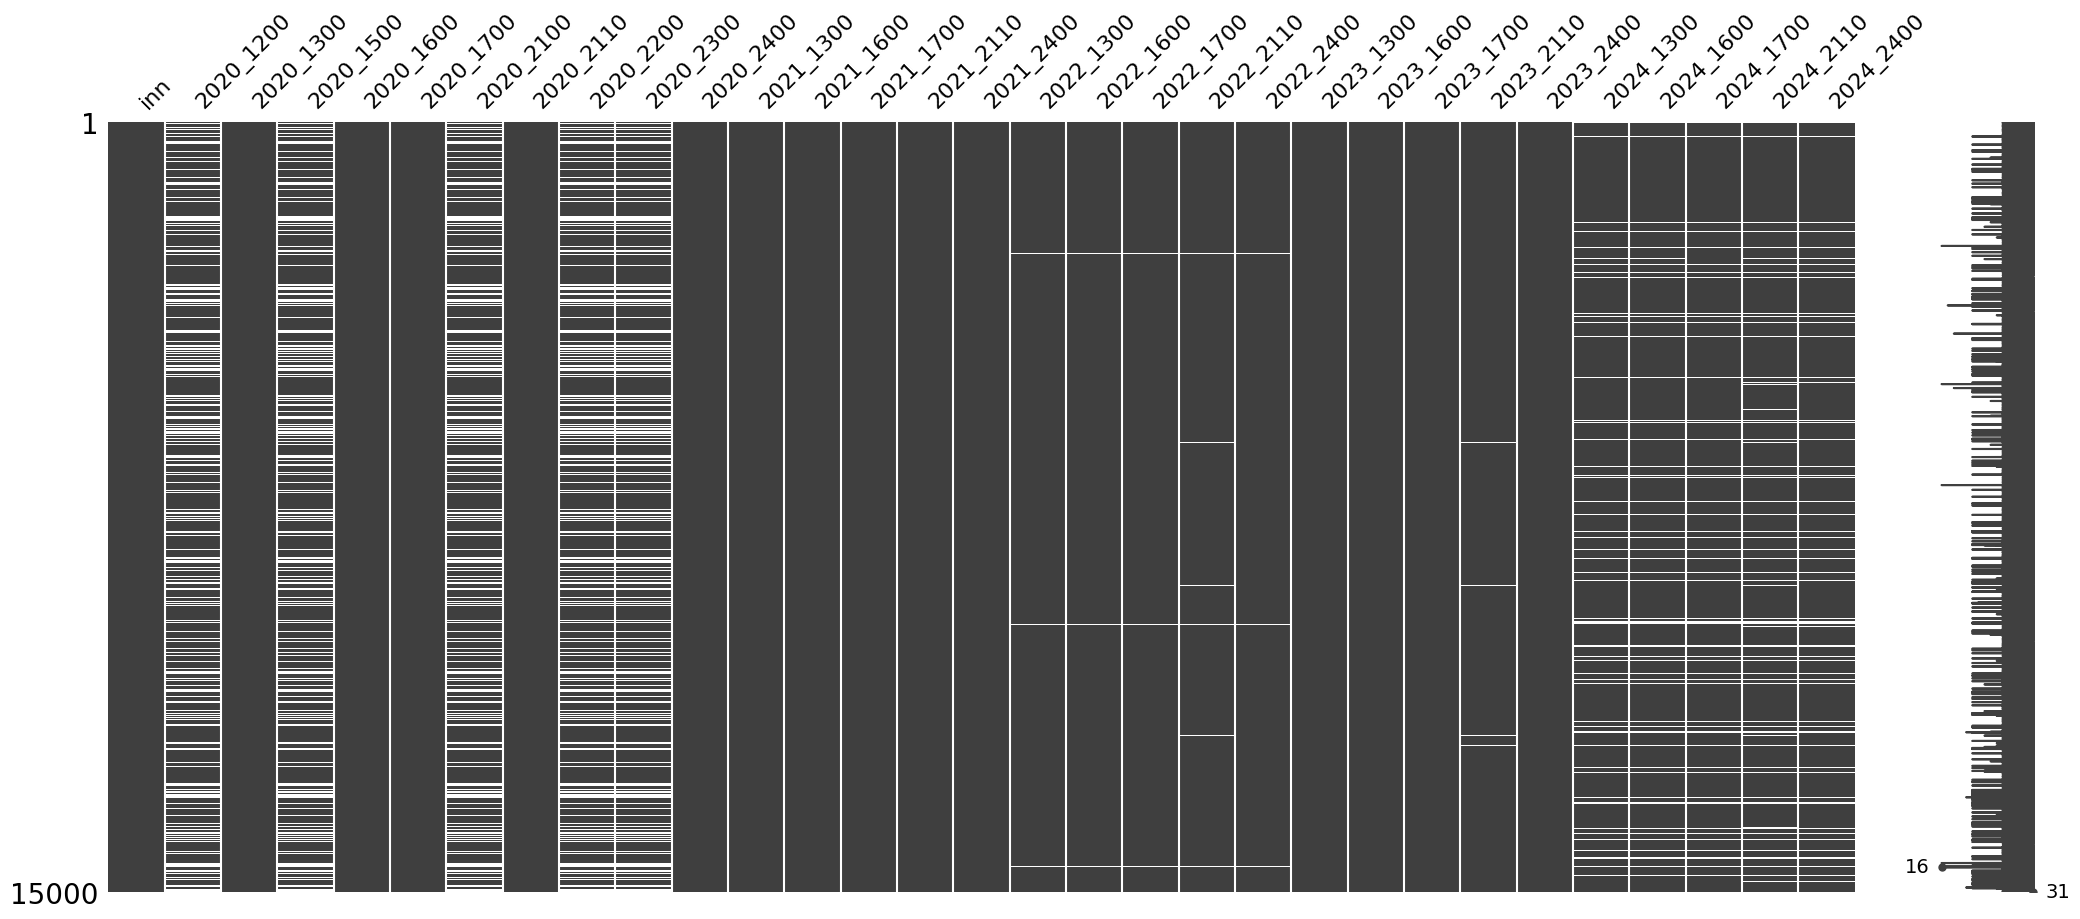

In [74]:
filtered_columns = [col for col in df_filtered_v03_01.columns 
                   if (len(col.split('_')) == 2 
                   and col.split('_')[0].isdigit() 
                   and int(col.split('_')[0]) >= 2020) or col == "inn"]
# print(filtered_columns)
df_filtered_v03_02 = df_filtered_v03_01[filtered_columns]
# df_filtered_v03_02 = df_filtered_v03_02.iloc[:, 1:]
df_filtered_v03_02.to_csv("PSB/data/finances_processed_codes.csv")
df_filtered_v03_02 = df_filtered_v03_02.dropna(axis=1, thresh=11000)
df_filtered_v03_02.info()
df_filtered_v03_02.describe()

msno.matrix(df_filtered_v03_02)
df_filtered_v03_02.head()
# df_filtered_v03_02["2020_1400_1"].info()
# df_filtered_v03_02.isna()
# df_filtered_v03_02.drop[[]]

<Axes: >

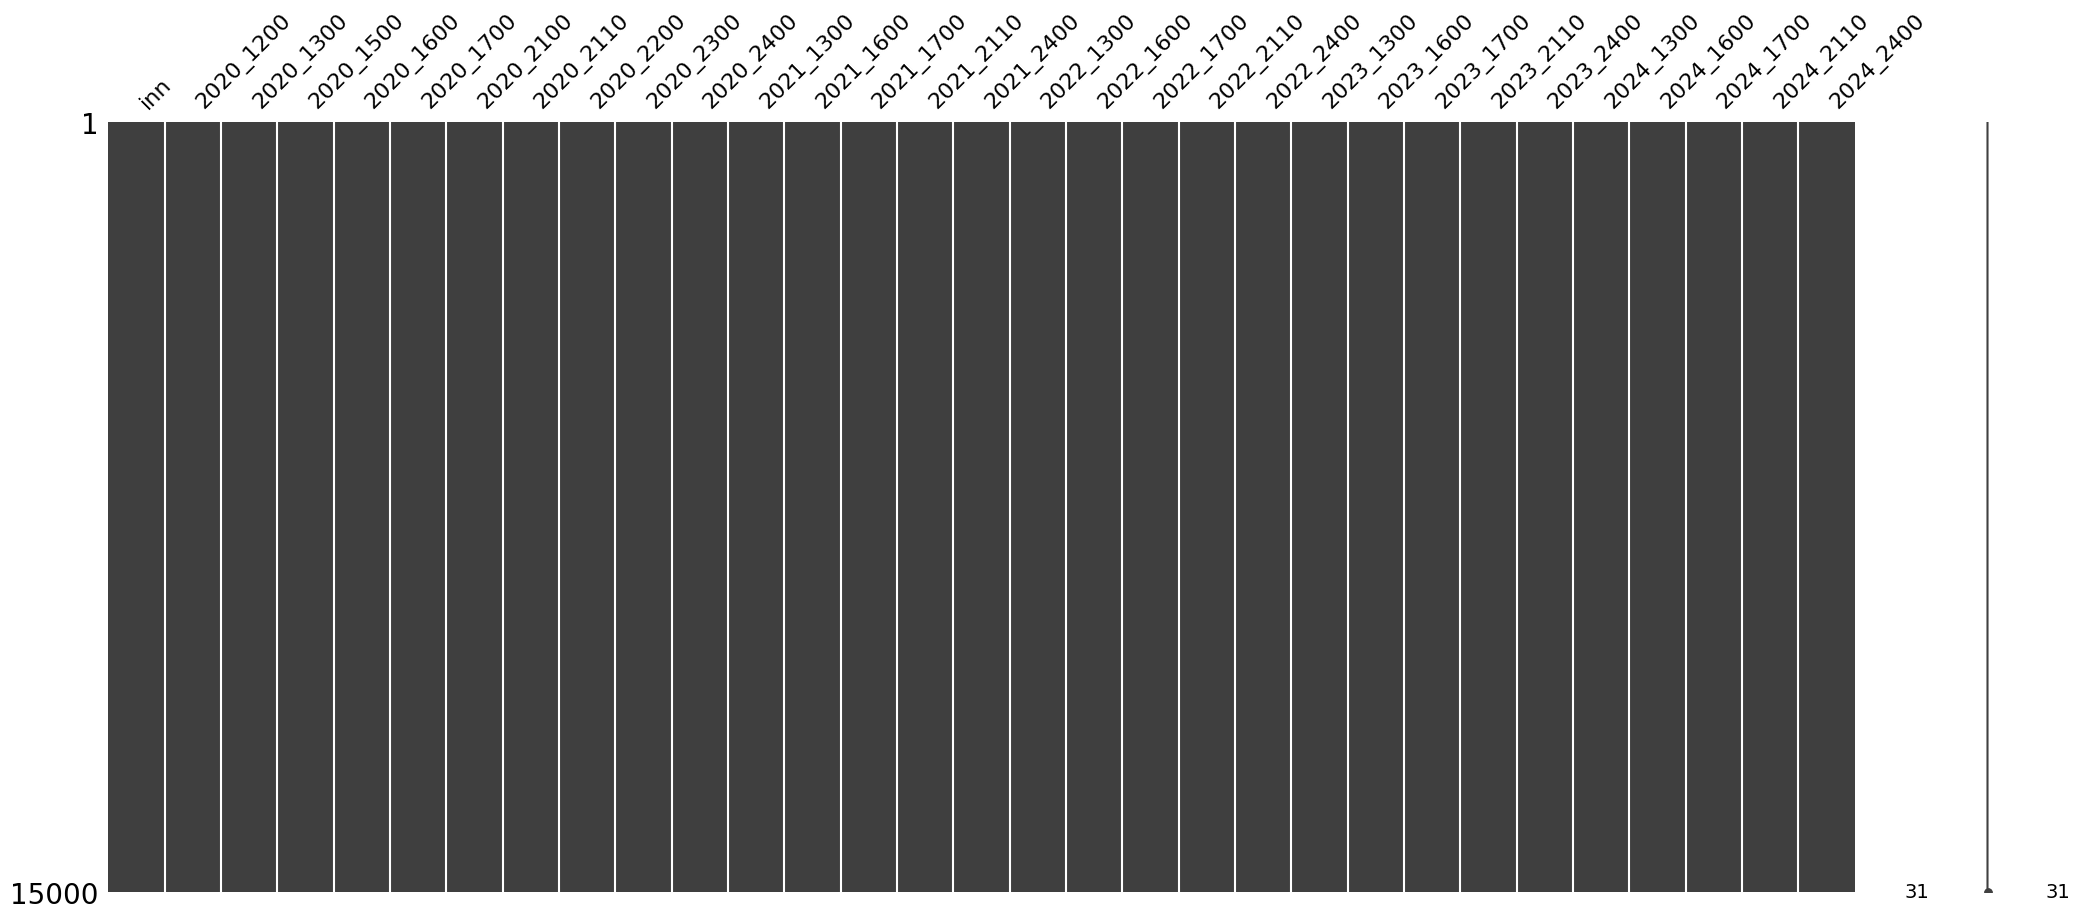

In [75]:
df_filtered_v03_02 = df_filtered_v03_02.fillna(df_filtered_v03_02.median(axis=0))
# df_filtered_v03_02.info()
df_filtered_v03_02 = df_filtered_v03_02.loc[:, ~df_filtered_v03_02.columns.duplicated(keep='first')]
df_filtered_v03_02.to_csv("PSB/data/finances_final.csv")
df_filtered_v03_02.head()
msno.matrix(df_filtered_v03_02)
# df_filtered_v03_02.info()
# msno.matrix(df_filtered_v03_02)
# df_filtered_v03_02.describe()